# Exploring Mushrooms


Mushrooms exist in a variety of different colors, shapes, sizes, textures, etc. In this project, you will analyze an extensive mushroom dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) using bar charts and acquaint yourself with the diverse array of mushrooms that exist worldwide.


## Looking Over the Data



1. Analyze this table to get a sense of the type(s) of variables in the data and the structure of the table. It may also be helpful to read through the information on [Kaggle](https://www.kaggle.com/uciml/mushroom-classification).

    Before you move on to plotting any of this data, answer the following questions:

    - What type(s) of variables does **mushroom_data.csv** contain?

      Most of them are categorical data, except for one boolean

    - How many of the variables can we visualize effectively with a bar graph?

      All categorical variables


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

# load in the data
df = pd.read_csv("mushroom_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap Shape                 8124 non-null   object
 2   Cap Surface               8124 non-null   object
 3   Cap Color                 8124 non-null   object
 4   Bruises                   8124 non-null   bool  
 5   Odor                      4596 non-null   object
 6   Gill Attachment           8124 non-null   object
 7   Gill Spacing              8124 non-null   object
 8   Gill Size                 8124 non-null   object
 9   Gill Color                8124 non-null   object
 10  Stalk Shape               8124 non-null   object
 11  Stalk Root                8124 non-null   object
 12  Stalk Surface Above Ring  8124 non-null   object
 13  Stalk Surface Below Ring  8124 non-null   object
 14  Stalk Color Above Ring  

In [14]:
print(df.describe(include="all"))

         Class Cap Shape Cap Surface Cap Color Bruises  Odor Gill Attachment  \
count     8124      8124        8124      8124    8124  4596            8124   
unique       2         6           4        10       2     8               2   
top     Edible    Convex       Scaly     Brown   False  Foul            Free   
freq      4208      3656        3244      2284    4748  2160            7914   

       Gill Spacing Gill Size Gill Color  ... Stalk Surface Below Ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top           Close     Broad       Buff  ...                   Smooth   
freq           6812      5612       1728  ...                     4936   

       Stalk Color Above Ring Stalk Color Below Ring Veil Type Veil Color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4 

In [15]:
print(df.head())

       Class Cap Shape Cap Surface Cap Color  Bruises     Odor  \
0  Poisonous    Convex      Smooth     Brown     True  Pungent   
1     Edible    Convex      Smooth    Yellow     True   Almond   
2     Edible      Bell      Smooth     White     True    Anise   
3  Poisonous    Convex       Scaly     White     True  Pungent   
4     Edible    Convex      Smooth      Gray    False      NaN   

  Gill Attachment Gill Spacing Gill Size Gill Color  ...  \
0            Free        Close    Narrow      Black  ...   
1            Free        Close     Broad      Black  ...   
2            Free        Close     Broad      Brown  ...   
3            Free        Close    Narrow      Brown  ...   
4            Free      Crowded     Broad      Black  ...   

  Stalk Surface Below Ring Stalk Color Above Ring Stalk Color Below Ring  \
0                   Smooth                  White                  White   
1                   Smooth                  White                  White   
2             

2. There are 23 variables in this dataset (one for each column). One of them (the `Bruises` variable) has `True` or `False` responses. This will create problems when we try to plot this column later on.

   One way we can fix this issue is by converting each `True` and `False` value to a string. Iterate through the elements in the `Bruises` variable and convert each value to a string using the `str()` method.

   Now, all our variables are of `object` types, which means we can graph them. Graphing each one individually would be tedious; luckily, you will use loops.

   You can now plot your data using the `.countplot()` method from the seaborn library. Follow these steps:

   - Call `.countplot()` inside a loop.
   - Use `column` and the `df` pandas DataFrame to graph the value counts of each variable in **mushroom_data.csv**.
   - Turn any bar graph with less than six bars into a pie chart.
   - Set the parameter so that the value counts in each column are in descending order.
   - Rotates the value labels slightly so they don't overlap, also slightly increases font size.
   - Using `.title()` from the Matplotlib library, give your graph a title.


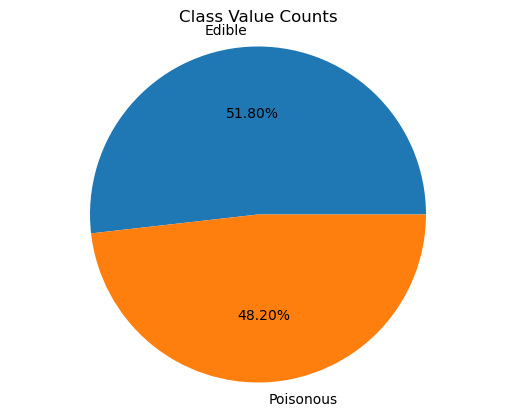

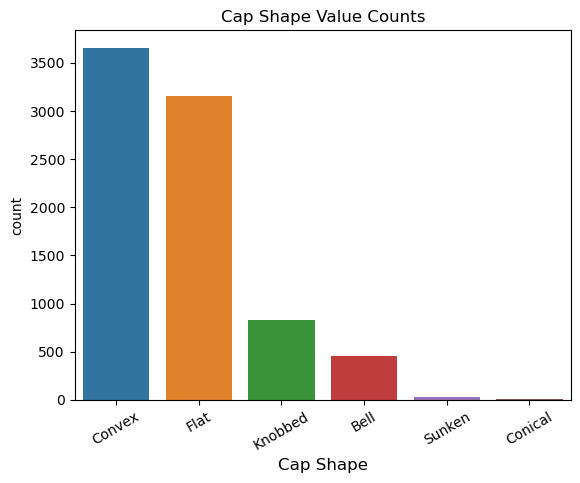

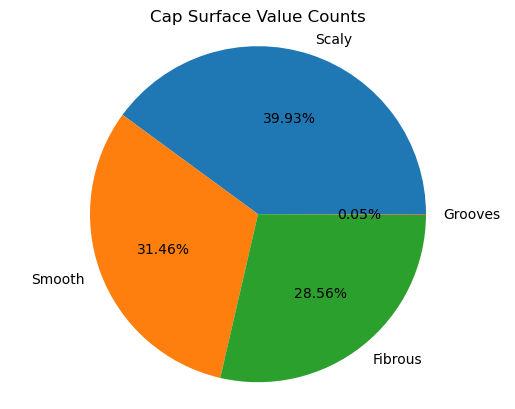

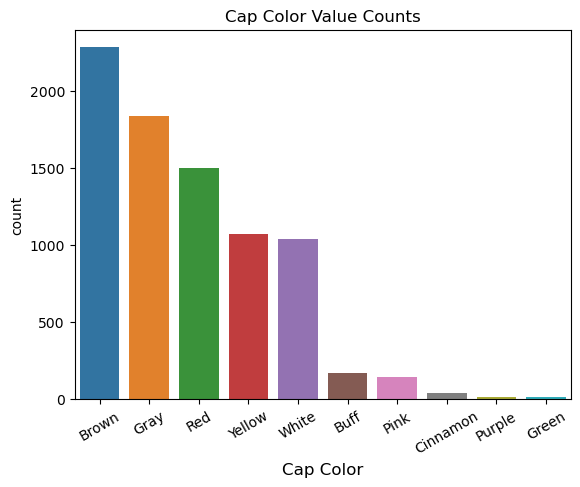

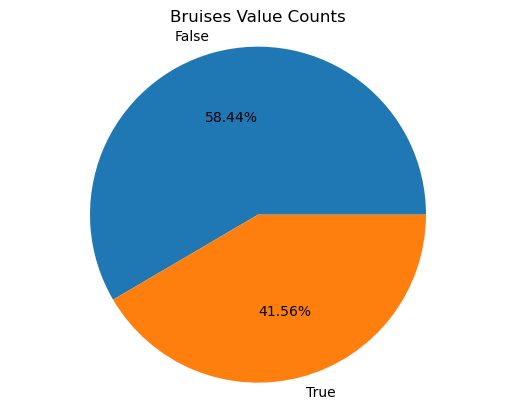

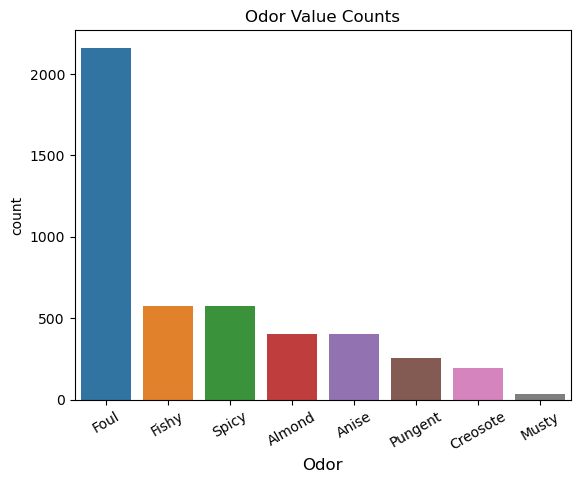

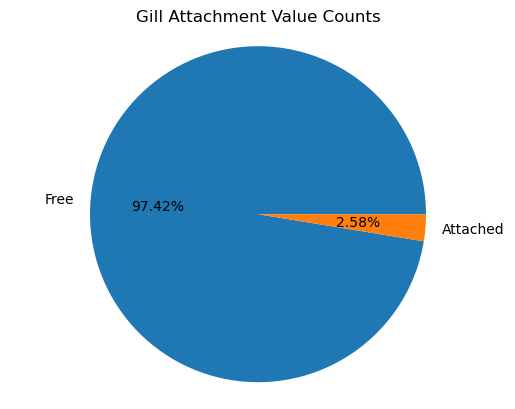

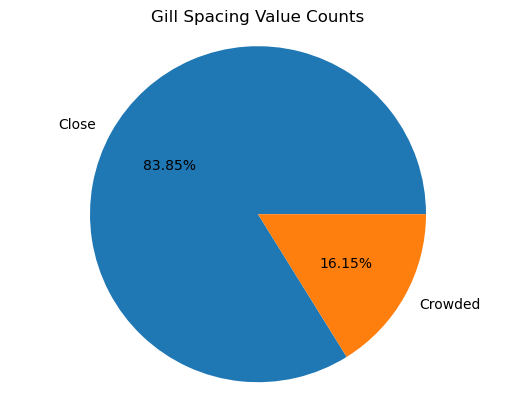

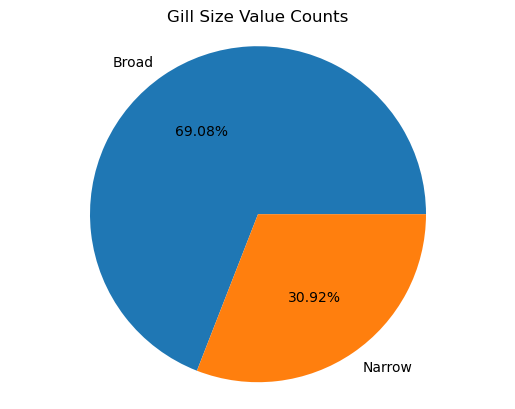

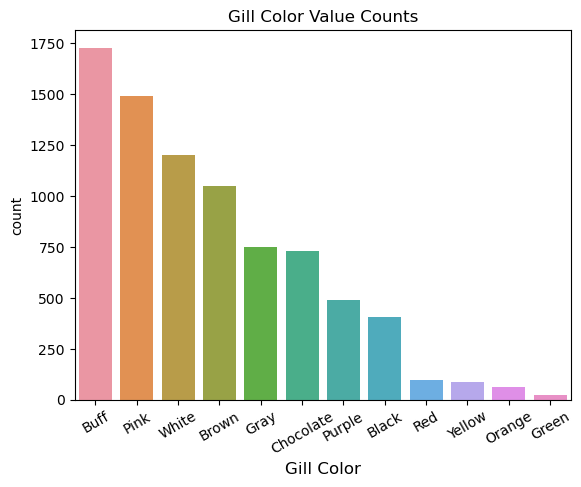

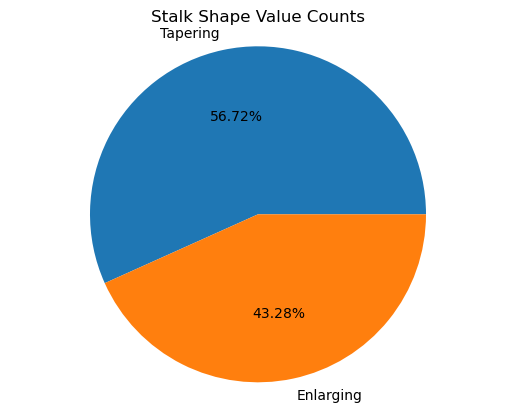

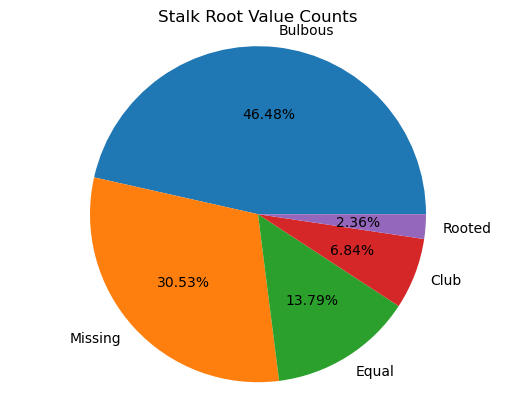

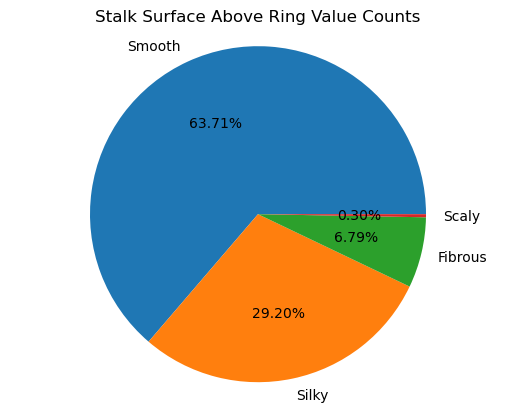

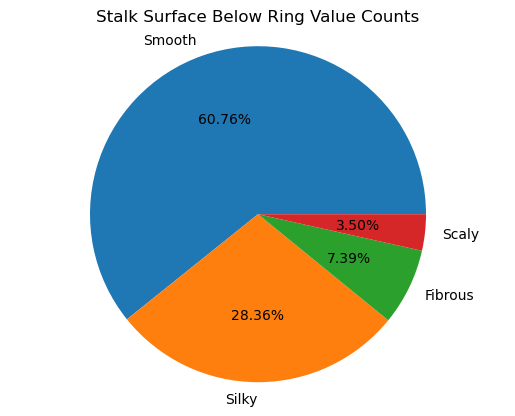

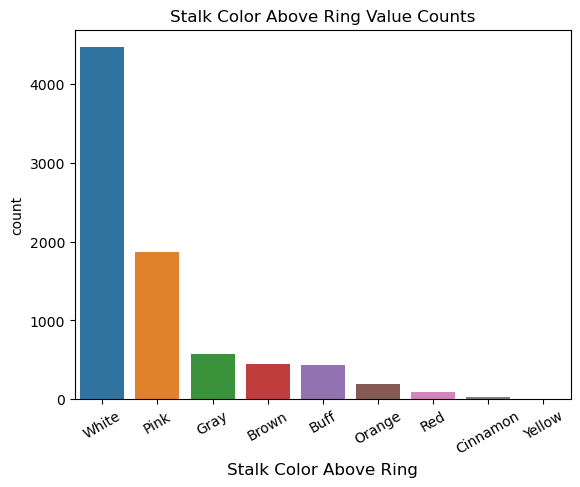

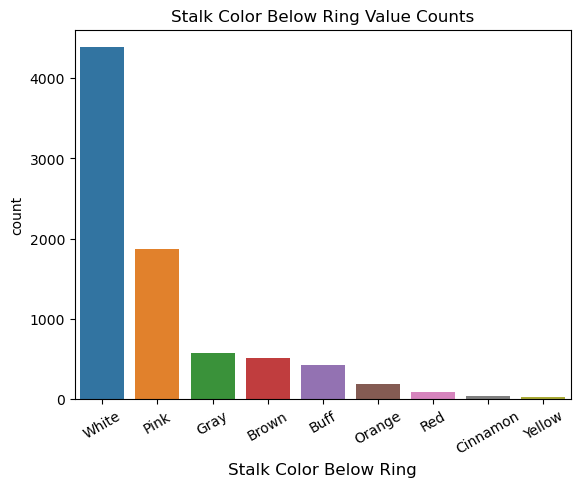

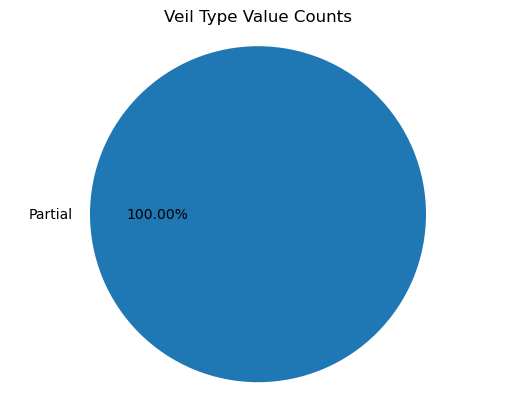

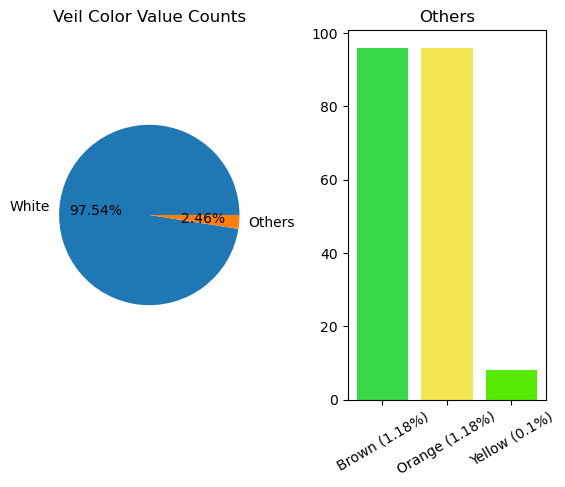

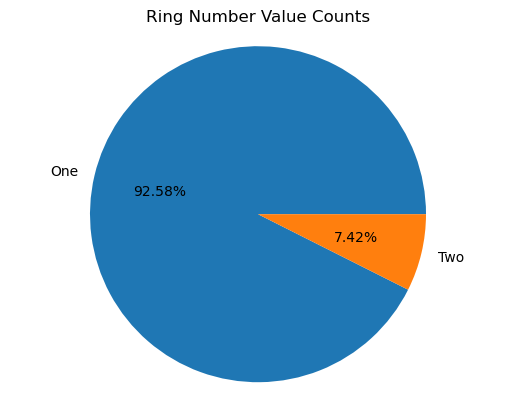

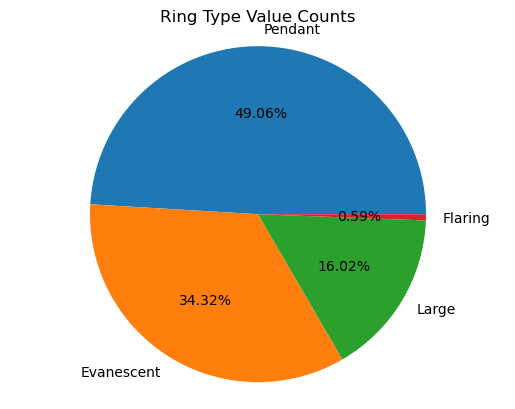

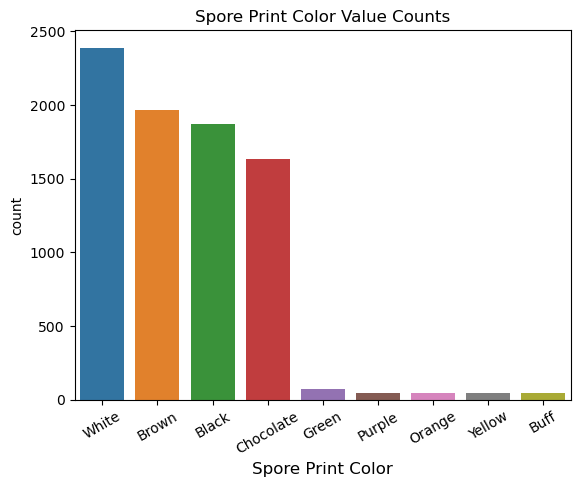

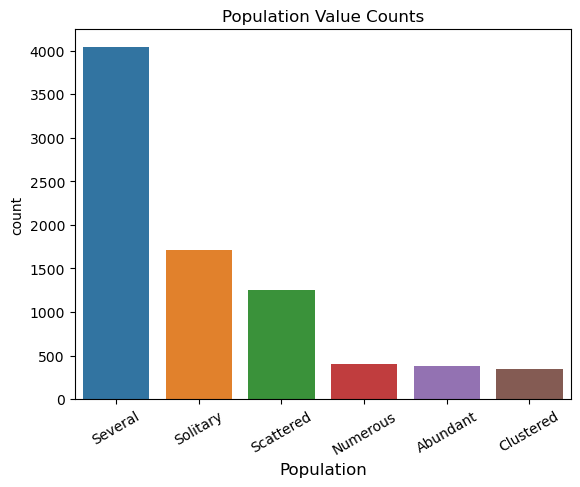

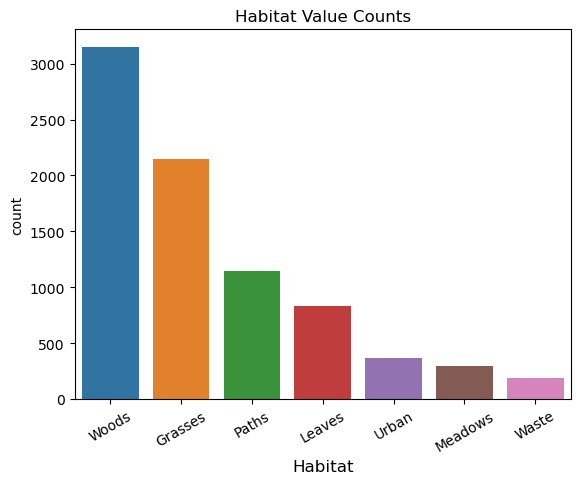

<Figure size 640x480 with 0 Axes>

In [16]:
df["Bruises"] = df["Bruises"].apply(str)

# list of all column headers
columns = df.columns.tolist()

threshold = 100

def generate_random_color():
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)
  return f'#{r:02x}{g:02x}{b:02x}'

def pie_graph(sizes, labels):
  plt.pie(sizes, labels=labels, autopct="%1.2f%%")
  plt.title(f"{column} Value Counts")
  plt.axis("equal")
  plt.show()
  plt.clf()

for column in columns:
  if len(df[column].unique()) < 6:
    column_counts = df[column].value_counts()
    small_sizes = column_counts[column_counts.values < threshold]
    aggregate = len(small_sizes) > 1

    column_labels = column_counts.index
    column_sizes = column_counts.values

    if aggregate:
      sum_small_sizes = column_counts[column_counts.values < threshold].sum()
      big_sizes = column_counts[column_counts.values >= threshold]

      new_df = pd.DataFrame({
        "labels": big_sizes.index.tolist() + ["Others"],
        "sizes":  big_sizes.tolist() + [sum_small_sizes]
      })
      column_labels = new_df["labels"]
      column_sizes = new_df["sizes"]

      small_sizes_labels_pct = [
        f"{label} ({round(small_sizes[label] * 100 / column_counts.sum(), 2)}%)"\
        for label in small_sizes.index
      ]
      
      plt.subplot(1, 2, 2)
      plt.bar(small_sizes_labels_pct, small_sizes.values, color=[generate_random_color() for _ in small_sizes.index])
      plt.title("Others")
      plt.subplots_adjust(wspace=0.5)
      plt.xticks(rotation=30)
      plt.subplot(1, 2, 1)
      pie_graph(column_sizes, column_labels)
    else:
      pie_graph(column_sizes, column_labels)
  else:
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.xticks(rotation=30, fontsize=10)
    plt.xlabel(column, fontsize=12)
    plt.title(f"{column} Value Counts")
    plt.show()
    plt.clf()


3. Great job! In relatively few lines of code, you have created 23 informative plots. Now that they are titled, labeled clearly, and ordered, you can really dive in on your analysis.

   Think about how someone could best use these visualizations. It is easy to tell which features of mushrooms are most common and rare, and we get insights into the variety of mushrooms in the fungi kingdom.

   Spend some time looking over the graphs. Write down exciting insights you find:

   - It is a roughly equal split between mushrooms that are edible vs. poisonous.
   - The common cap shapes are "convex" and "flat", followed by "knobbed" and "bell". "Sunken" and "conical" are rare.
   - The majority of mushrooms in this dataset have a scaly surface. "Grooves" surface is almost null.
   - The most common color in mushrooms is "brown" and "buff", "pink", "cinnamon", "purple" and "green" are rare.
   - The "Foul" odor constitutes a large portion of the total odor instances, indicating that it is a predominant odor in the dataset.
   - Most vail color in mushrooms is "white", "brown", "orange" and "yellow" are uncommon.
